<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #00FF00;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Nvidia Stock <br>
    (EDA / Machine learning)
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv


# Read Dataset

In [2]:
df = pd.read_csv('/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv')
df.head(5)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB


In [4]:
df.drop(index=[0,1], inplace=True)
df.rename(columns={'Price': 'Date'}, inplace=True)

for col in df.columns:
    if col != 'Date':  
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
2,2018-01-02,4.929880,4.98375,4.98750,4.86250,4.89450,355616000
3,2018-01-03,5.254335,5.31175,5.34250,5.09375,5.10250,914704000
4,2018-01-04,5.282033,5.33975,5.45125,5.31725,5.39400,583268000
5,2018-01-05,5.326794,5.38500,5.42275,5.27700,5.35475,580124000
6,2018-01-08,5.490012,5.55000,5.62500,5.46450,5.51000,881216000


In [5]:
print("Missing value\n")
df.isnull().sum()

Missing value



Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

# EDA

In [6]:
import plotly.graph_objects as go

# Open Prices Over Time
fig1 = go.Figure(data=go.Scatter(x=df['Date'], y=df['Open'], mode='lines'))
fig1.update_layout(
    title='Open Prices Over Time',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis_title='Date',
    yaxis_title='Open'
)
fig1.show()

# Close Prices Over Time
fig2 = go.Figure(data=go.Scatter(x=df['Date'], y=df['Close'], mode='lines'))
fig2.update_layout(
    title='Close Prices Over Time',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis_title='Date',
    yaxis_title='Close'
)
fig2.show()

# High Prices Over Time
fig3 = go.Figure(data=go.Scatter(x=df['Date'], y=df['High'], mode='lines'))
fig3.update_layout(
    title='High Prices Over Time',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis_title='Date',
    yaxis_title='High'
)
fig3.show()

# Low Prices Over Time
fig4 = go.Figure(data=go.Scatter(x=df['Date'], y=df['Low'], mode='lines'))
fig4.update_layout(
    title='Low Prices Over Time',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis_title='Date',
    yaxis_title='Low'
)
fig4.show()

# Volume Over Time (Bar Plot)
fig5 = go.Figure(data=go.Bar(x=df['Date'], y=df['Volume']))
fig5.update_layout(
    title='Volume Over Time',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis_title='Date',
    yaxis_title='Volume'
)
fig5.show()


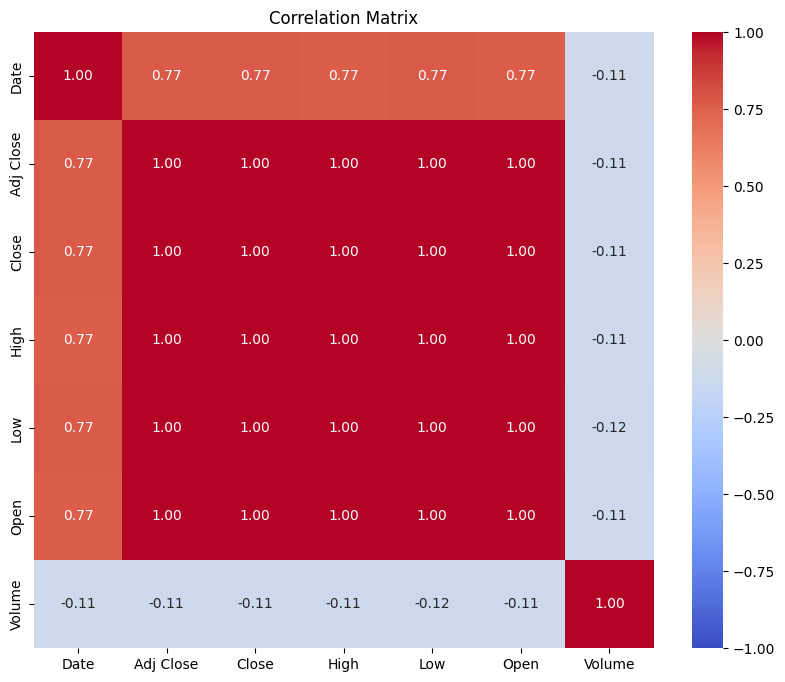

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.title('Correlation Matrix')
plt.show()

# Comparison of regression model performance

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df['Date'] = pd.to_datetime(df['Date']) 
df['Date'] = df['Date'].apply(lambda x: x.timestamp())  

X = df.drop('Close', axis=1) 
y = df['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
#  "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
#    "Decision Tree": DecisionTreeRegressor(random_state=42),
#    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
#    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

In [10]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Linear Regression,0.000112,1.000000
ElasticNet,0.000145,1.000000
Polynomial Regression,0.032745,0.999962
XGBoost,0.256820,0.999705
KNN,41.950937,0.951782


In [11]:
# Model Performance (R²) Plot
fig_r2 = go.Figure(data=go.Bar(
    x=results_df.index,
    y=results_df['R²'],
    marker=dict(color=results_df['R²'], colorscale='Blues', opacity=0.8)
))
fig_r2.update_layout(
    title='Model Performance (R²)',
    xaxis_title='Model',
    yaxis_title='R² Score',
    xaxis_tickangle=45,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
)
fig_r2.show()

# Model Performance (MSE) Plot
fig_mse = go.Figure(data=go.Bar(
    x=results_df.index,
    y=results_df['MSE'],
    marker=dict(color=results_df['MSE'], colorscale='Oranges', opacity=0.8)
))
fig_mse.update_layout(
    title='Model Performance (MSE)',
    xaxis_title='Model',
    yaxis_title='Mean Squared Error',
    xaxis_tickangle=45,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
)
fig_mse.show()

# Best Model by R² Score
best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

Best Model:
MSE    0.000112
R²     1.000000
Name: Linear Regression, dtype: float64


# Linear Regression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred,  
    mode='markers',
    marker=dict(color='blue', size=8, line=dict(width=0.5, color='black')),
    name='Predictions'
))

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    line=dict(color='red', dash='dash', width=2),
    name='Ideal (y=x)'
))

fig.update_layout(
    title='Actual vs Predicted Values (Linear Regression)',
    xaxis=dict(title='Actual Values'),
    yaxis=dict(title='Predicted Values'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=16, color='white'),
    showlegend=True
)

fig.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression : MSE = {mse}, R² = {r2}')

Linear Regression : MSE = 0.00011228446733419581, R² = 0.9999998709403893


# Thanks